In [1]:
import numpy as np

from keras.layers import Input, Dense, Activation
from keras.models import Model
from keras import backend as K
from keras import metrics
from keras.datasets import mnist

import tensorflow as tf
import keras

from tensorflow.python.framework import random_seed
from tensorflow.python.ops import gen_random_ops
from tensorflow.python.ops import math_ops

from keras.engine.topology import Layer

Using TensorFlow backend.


In [2]:
from v_drop_utils import *

x_train, x_test, y_train, y_test, y_train_1hot, y_test_1hot = get_mnist()

In [3]:
from v_drop import *
batch_size = 32

In [35]:
my_model = define_networks((batch_size,784), 3, 64)

In [36]:
my_model.summary()


preds = my_model.predict(x_test[:batch_size], batch_size=batch_size)
preds[0]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
x_input (InputLayer)         (32, 784)                 0         
_________________________________________________________________
h0 (VariationalDropoutLayer) (32, 64)                  100352    
_________________________________________________________________
a0 (Activation)              (32, 64)                  0         
_________________________________________________________________
h1 (VariationalDropoutLayer) (32, 64)                  8192      
_________________________________________________________________
a1 (Activation)              (32, 64)                  0         
_________________________________________________________________
h2 (VariationalDropoutLayer) (32, 64)                  8192      
_________________________________________________________________
a2 (Activation)              (32, 64)                  0         
__________

array([ 0.0847579 ,  0.15295692,  0.08717388,  0.14159749,  0.06921946,
        0.09279388,  0.14261246,  0.08807988,  0.05450133,  0.0863068 ], dtype=float32)

In [41]:
cut_test = int(x_test.shape[0]/batch_size) * batch_size
x_test = x_test[:cut_test]
y_test = y_test[:cut_test]
y_test_1hot = y_test_1hot[:cut_test]
my_model.fit(x_train, y_train_1hot, batch_size=batch_size,
             epochs=10, validation_data = (x_test,y_test_1hot))



Train on 60000 samples, validate on 9984 samples
Epoch 1/10
60000/60000 [==============================] - 11s - loss: 2.6180 - categorical_accuracy: 0.9866 - val_loss: 2.2724 - val_categorical_accuracy: 0.9716
Epoch 2/10
60000/60000 [==============================] - 8s - loss: 1.7676 - categorical_accuracy: 0.9843 - val_loss: 1.3890 - val_categorical_accuracy: 0.9756
Epoch 3/10
60000/60000 [==============================] - 8s - loss: 0.9408 - categorical_accuracy: 0.9814 - val_loss: 0.6046 - val_categorical_accuracy: 0.9747
Epoch 4/10
60000/60000 [==============================] - 8s - loss: 0.2909 - categorical_accuracy: 0.9751 - val_loss: 0.0472 - val_categorical_accuracy: 0.9738
Epoch 5/10
60000/60000 [==============================] - 8s - loss: -0.1303 - categorical_accuracy: 0.9698 - val_loss: -0.3027 - val_categorical_accuracy: 0.9752
Epoch 6/10
60000/60000 [==============================] - 9s - loss: -0.3563 - categorical_accuracy: 0.9669 - val_loss: -0.4272 - val_categoric

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
my_model.get_weights()[1][:,0].shape

(784,)

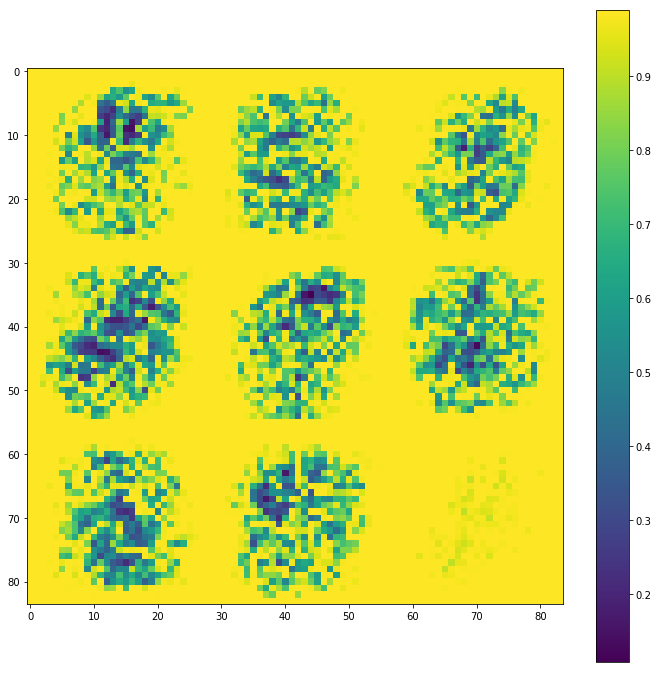

In [42]:

arr = np.zeros((3*28, 3*28))
for i in range(3):
    for j in range(3):
        arr[i*28 : (i+1)*28, j*28 : (j+1)*28,]= np.reshape(my_model.get_weights()[1][:,i*3+j],(28,28))
        
plt.figure(figsize=(12,12))
plt.imshow(arr)
plt.colorbar()

In [ ]:

arr = np.zeros((3*8, 3*8))
for i in range(3):
    for j in range(3):
        arr[i*8 : (i+1)*8, j*8 : (j+1)*8,]= np.reshape(h4.get_weights()[1][:,i+j*3],(8,8))
        
plt.figure(figsize=(12,12))
plt.imshow(arr)